In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['flowers']=iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowers
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
x=df.drop('flowers',axis=1)
y=df.flowers

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predicted=model.predict(x_test)

In [17]:
predicted

array([1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       2])

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
cm

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 13]], dtype=int64)

Text(69.0, 0.5, 'TRUTH')

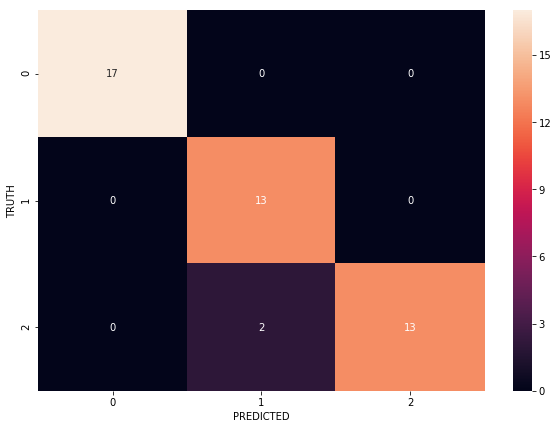

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")

In [22]:
model.score(x_test,y_test)

0.9555555555555556

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=20, metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [37]:
predict=model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
cm

array([[17,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 14]], dtype=int64)

Text(69.0, 0.5, 'TRUTH')

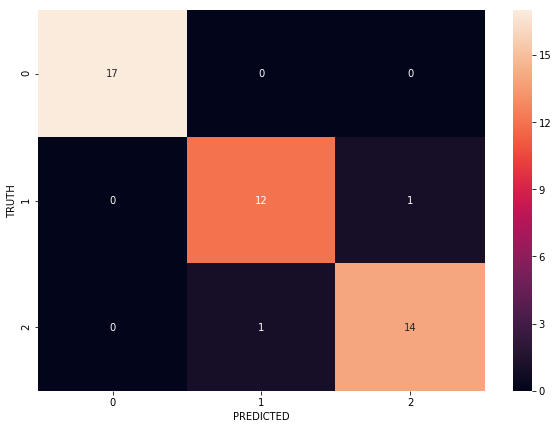

In [39]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")

In [40]:
model.score(x_train,y_train)

0.9714285714285714

In [1]:
import pandas as pd
df=pd.read_csv('clustering.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [2]:
df=df.drop(['Loan_ID','Dependents'],axis=1)

In [3]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.Gender=df.Gender.fillna('Male')
df.Self_Employed=df.Self_Employed.fillna('No')


In [5]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
import math
df.Loan_Amount_Term.median()

360.0

In [7]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())

In [8]:
df.Credit_History.median()

1.0

In [9]:
df.Credit_History=df.Credit_History.fillna(df.Credit_History.median())

In [10]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [11]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()
label5=LabelEncoder()
label6=LabelEncoder()

In [12]:
df.Gender=label1.fit_transform(df.Gender)
df.Married=label2.fit_transform(df.Married)
df.Education=label3.fit_transform(df.Education)
df.Self_Employed=label4.fit_transform(df.Self_Employed)
df.Property_Area=label5.fit_transform(df.Property_Area)
df.Loan_Status=label6.fit_transform(df.Loan_Status)

In [13]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [14]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
model.score(x_test,y_test)

0.6782608695652174

In [19]:
predict=model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
cm

array([[ 4, 28],
       [ 9, 74]], dtype=int64)

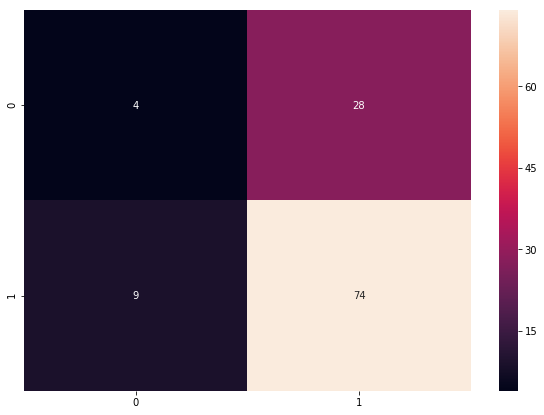

In [22]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)